In [21]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
content = pd.read_csv("/kaggle/input/accenture-data/Content.csv")
reaction_types = pd.read_csv("/kaggle/input/accenture-data/ReactionTypes.csv")
reactions = pd.read_csv("/kaggle/input/accenture-data/Reactions.csv")


In [11]:

print(content.info())
print(content.isna().sum())
print(content.duplicated().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None
Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64
0


In [12]:
new_content = content.drop(columns=["Unnamed: 0","URL", "User ID"], axis= 1)
new_content["Category"] = new_content["Category"].str.replace('"', "")
new_content["Category"] = new_content["Category"].str.capitalize()
new_content = new_content.rename(columns= {'Type': "Content Type"})
new_content.to_csv("new_content.csv", index= False)


In [13]:
print(reactions.info())
print(reactions.isna().sum())
print(reactions.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB
None
Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64
0


In [14]:
new_reactions = reactions.drop(columns= ["Unnamed: 0", "User ID"], axis= 1)
new_reactions = new_reactions.dropna()
new_reactions.to_csv("new_reactions.csv", index = False)


In [15]:
print(reaction_types.info())
print(reaction_types.isna().sum())
print(reaction_types.duplicated().sum())
print(reaction_types.head(12))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes
None
Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64
0
    Unnamed: 0         Type Sentiment  Score
0            0        heart  positive     60
1            1         want  positive     70
2            2      disgust  negative      0
3            3         hate  negative      5
4            4   interested  positive     30
5            5  indifferent   neutral     20
6            6         love  positive     65
7            7   super love  positive     75
8            8      cherish  positive     70
9            9        adore  positive     72
10          10         l

In [85]:
reactions_content = new_reactions.merge(new_content, on= "Content ID")
types_reactions_content = reactions_content.merge(reaction_types, on= "Type")
types_reactions_content.head(12)

trc = types_reactions_content.groupby("Category")["Score"].sum()
trc_five = trc.sort_values(ascending= False)[:5]
# Converting groupby to index and score as values by using dictionary of lists
trc_df = pd.DataFrame({"Category": trc_five.index, "Score":trc_five.values})

# saving data
trc_df.to_csv("final_data.csv", index= False)


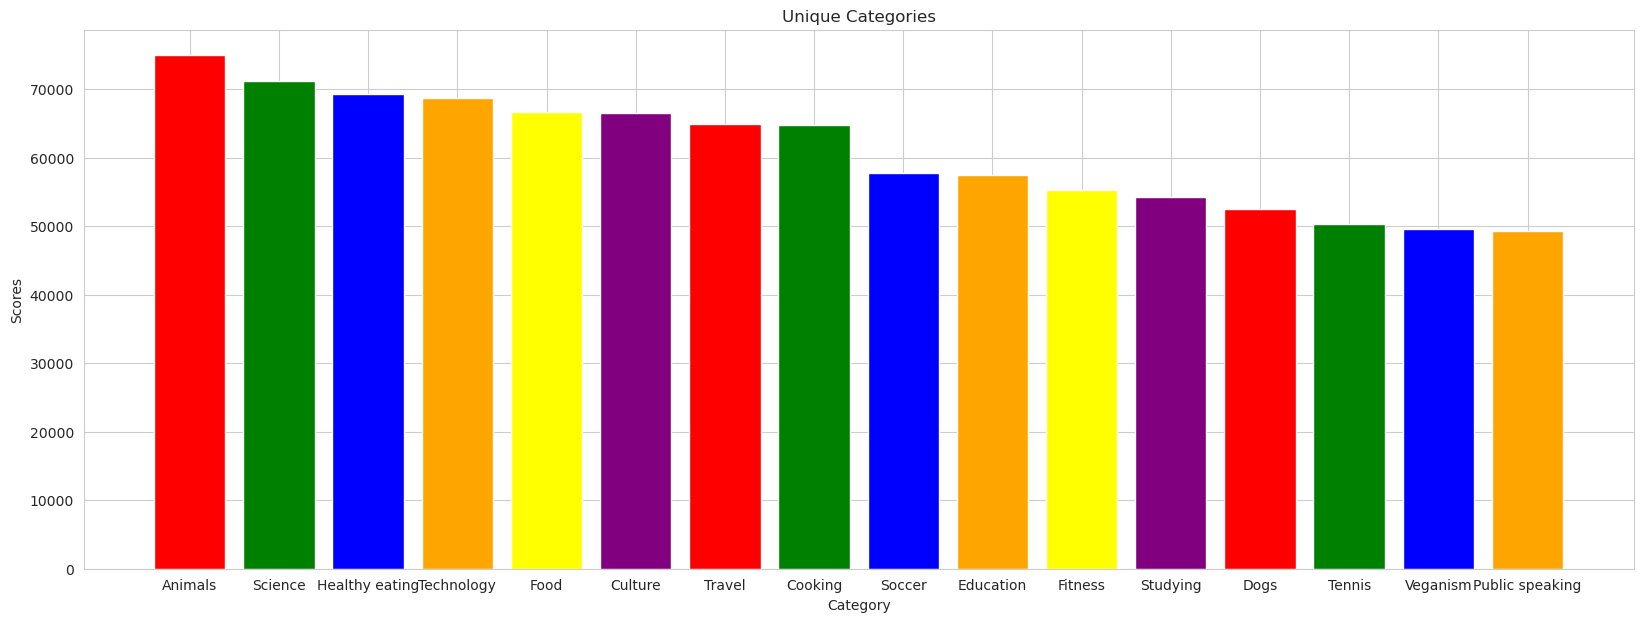

In [87]:
sns.set_style("whitegrid")
fig, ax=plt.subplots(figsize= (20, 7))
scores_sorted = trc.sort_values(ascending= False)
colors =  ["red", 'green', 'blue', 'orange', 'yellow', 'purple']
ax.bar(scores_sorted.index, scores_sorted.values, color= colors)
ax.set_title("Unique Categories")
ax.set_xlabel("Category")
ax.set_ylabel("Scores")
plt.show()






In [49]:
final_set = pd.read_csv("/kaggle/input/final-data-set/Task 3_Final Content Data set.csv", parse_dates= ["Datetime"])
final_set.head()



,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-07-11 09:43:00,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-06-01 19:13:00,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:00,photo,studying,positive,30


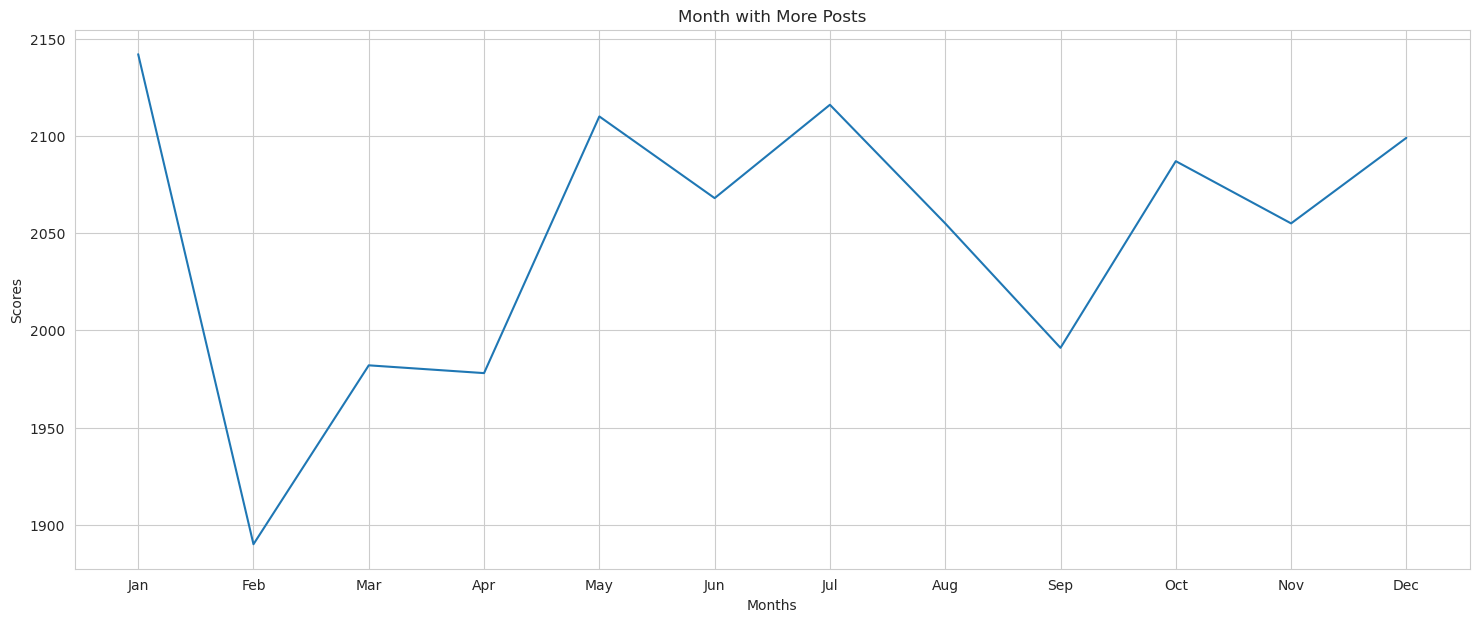

In [75]:
final_set["Month"] = final_set["Datetime"].dt.month
monthly_post = final_set.groupby("Month")["Content ID"].count()
fig, ax= plt.subplots(figsize= (18,7))
ax.plot(monthly_post.index, monthly_post)
month = ["Jan", 'Feb', 'Mar', "Apr","May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
ax.set_xticks(range(1,13))
ax.set_xticklabels(month)
ax.set_xlabel("Months")
ax.set_ylabel("Scores")
ax.set_title("Month with More Posts")
plt.show()

In [81]:
each_cat_count = final_set["Category"].value_counts()
cat_counts = final_set["Category"].nunique()
print(cat_counts)
print(each_cat_count)


16
animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64


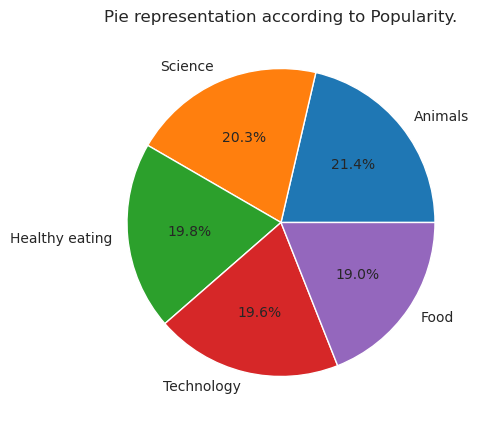

In [97]:
pop_pie = final_set.groupby("Category")["Score"].size()
fig, ax= plt.subplots(figsize= (15,5))
ax.pie(trc_five, labels = trc_five.index, autopct= '%1.1f%%')
ax.set_title("Pie representation according to Popularity.")
plt.show()